In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('Admission_Data.csv')
df

,Gender,Undergraduate_University,Undergraduate_CGPA,GRE,IELTS_TOEFL,Subject_got_chance,Work_experience,Research,Effort,Ranking,Chance,work_position_before_admission
0,Male,Bachelor of dental surgery,3.52,296,99,Food and Health Nutration,1,0,Satisfactory,5,1,Dental Assistant
1,Male,Mawlana Bhashani Science and Technology Univer...,3.67,303,81,Computer Science,0,1,Satisfactory,3,1,Lecturer
2,Male,Rajshahi University of Engineering & Technology,3.82,309,98,Computer Science,1,1,Very good,6,1,Lecturer
3,Female,Bangladesh University of Engineering and Techn...,3.24,315,111,Computer Science,0,2,Fair,1,1,Lecturer
4,Male,International Islamic University Chittagong,3.80,302,108,Chemistry,0,6,Very good,4,1,Assistant Chemist
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Male,University of Chittagong,3.30,165,90,Chemistry,1,2,Very good,4,1,Lecturer
196,Male,Chittagong University of Engineering & Technology,3.39,312,84,Civil Engineering,0,0,Poor,10,1,Lecturer
197,Male,Bangladesh University of Engineering and Techn...,3.52,330,104,Computer Science,1,0,Fair,8,1,Software Engineer
198,Female,Bangladesh University of Engineering and Techn...,3.69,313,96,Computer Science,1,0,Excellent,1,1,Lecturer


In [3]:
print(df.shape)

(200, 12)


In [4]:
df.describe()

,Undergraduate_CGPA,GRE,IELTS_TOEFL,Work_experience,Research,Ranking,Chance
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.538790,301.350000,101.105000,0.615000,2.490000,4.315000,0.735000
std,0.274253,34.022421,8.597299,0.487816,2.420578,2.813423,0.442441
min,2.790000,157.000000,81.000000,0.000000,0.000000,1.000000,0.000000
25%,3.367500,302.000000,93.750000,0.000000,1.000000,2.000000,0.000000
50%,3.535000,308.000000,101.000000,1.000000,2.000000,4.000000,1.000000
75%,3.770000,315.000000,108.250000,1.000000,4.000000,6.000000,1.000000
max,4.000000,333.000000,118.000000,1.000000,15.000000,10.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          200 non-null    object 
 1   Undergraduate_University        200 non-null    object 
 2   Undergraduate_CGPA              200 non-null    float64
 3   GRE                             200 non-null    int64  
 4   IELTS_TOEFL                     200 non-null    int64  
 5   Subject_got_chance              200 non-null    object 
 6   Work_experience                 200 non-null    int64  
 7   Research                        200 non-null    int64  
 8   Effort                          200 non-null    object 
 9   Ranking                         200 non-null    int64  
 10  Chance                          200 non-null    int64  
 11  work_position_before_admission  200 non-null    object 
dtypes: float64(1), int64(6), object(5)
m

In [6]:
# sns.set(rc={'figure.figsize':(10,8)})
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


array([[<AxesSubplot:title={'center':'Undergraduate_CGPA'}>,
        <AxesSubplot:title={'center':'GRE'}>,
        <AxesSubplot:title={'center':'IELTS_TOEFL'}>],
       [<AxesSubplot:title={'center':'Work_experience'}>,
        <AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Ranking'}>],
       [<AxesSubplot:title={'center':'Chance'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

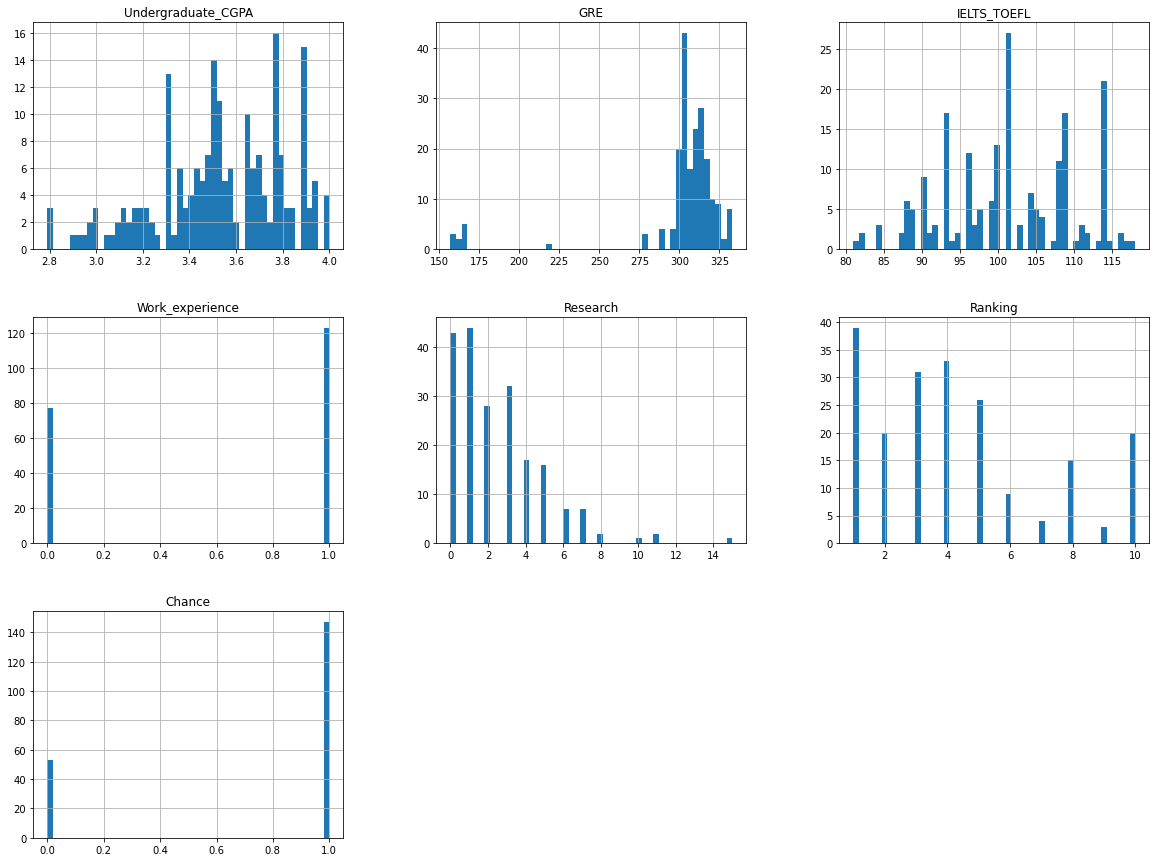

In [8]:
%matplotlib inline
# For plotting histogram
df.hist(bins=50, figsize=(20, 15))

In [9]:
# train_processed = pd.get_dummies(df, drop_first=True)

In [10]:
label_X = df.copy()

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
s = (label_X.dtypes == 'object')
object_cols = list(s[s].index)

In [13]:
s

Gender                             True
Undergraduate_University           True
Undergraduate_CGPA                False
GRE                               False
IELTS_TOEFL                       False
Subject_got_chance                 True
Work_experience                   False
Research                          False
Effort                             True
Ranking                           False
Chance                            False
work_position_before_admission     True
dtype: bool

In [14]:
# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

In [15]:
label_X

,Gender,Undergraduate_University,Undergraduate_CGPA,GRE,IELTS_TOEFL,Subject_got_chance,Work_experience,Research,Effort,Ranking,Chance,work_position_before_admission
0,1.0,6.0,3.520,296,99,11.0,1,0,3.0,5,1,5.0
1,1.0,22.0,3.670,303,81,7.0,0,1,3.0,3,1,12.0
2,1.0,29.0,3.820,309,98,7.0,1,1,4.0,6,1,12.0
3,0.0,8.0,3.240,315,111,7.0,0,2,1.0,1,1,12.0
4,1.0,13.0,3.800,302,108,3.0,0,6,4.0,4,1,1.0
5,0.0,8.0,3.930,302,104,3.0,0,7,0.0,1,1,3.0
6,0.0,38.0,3.110,303,88,24.0,0,0,1.0,5,1,12.0
7,0.0,37.0,3.910,300,101,1.0,1,7,4.0,3,1,12.0
8,1.0,38.0,3.940,302,93,1.0,0,1,3.0,6,1,12.0
9,1.0,39.0,3.160,165,93,7.0,0,0,1.0,6,1,12.0


In [16]:
# label_X.hist(bins=50, figsize=(20, 15))

# Using Lambda for normalize

In [17]:
X_Data= label_X.drop(['Chance'],axis=1)
Y_Data= label_X['Chance']

In [18]:
X_Data = X_Data.apply(lambda x: (x-x.min(axis=0) ) / (x.max(axis=0) - x.min(axis=0)) )

# Minmax scaler

In [19]:
# from sklearn.preprocessing import MinMaxScaler

In [20]:
X_Data.head(5)

,Gender,Undergraduate_University,Undergraduate_CGPA,GRE,IELTS_TOEFL,Subject_got_chance,Work_experience,Research,Effort,Ranking,work_position_before_admission
0,1.0,0.150,0.603306,0.789773,0.486486,0.423077,1.0,0.000000,0.75,0.444444,0.263158
1,1.0,0.550,0.727273,0.829545,0.000000,0.269231,0.0,0.066667,0.75,0.222222,0.631579
2,1.0,0.725,0.851240,0.863636,0.459459,0.269231,1.0,0.066667,1.00,0.555556,0.631579
3,0.0,0.200,0.371901,0.897727,0.810811,0.269231,0.0,0.133333,0.25,0.000000,0.631579
4,1.0,0.325,0.834711,0.823864,0.729730,0.115385,0.0,0.400000,1.00,0.333333,0.052632


In [21]:
# scaler = MinMaxScaler()
# scaler.fit(X_Data)
# New_Data = scaler.transform(X_Data)

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Undergraduate_University'}>,
        <AxesSubplot:title={'center':'Undergraduate_CGPA'}>],
       [<AxesSubplot:title={'center':'GRE'}>,
        <AxesSubplot:title={'center':'IELTS_TOEFL'}>,
        <AxesSubplot:title={'center':'Subject_got_chance'}>],
       [<AxesSubplot:title={'center':'Work_experience'}>,
        <AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Effort'}>],
       [<AxesSubplot:title={'center':'Ranking'}>,
        <AxesSubplot:title={'center':'work_position_before_admission'}>,
        <AxesSubplot:>]], dtype=object)

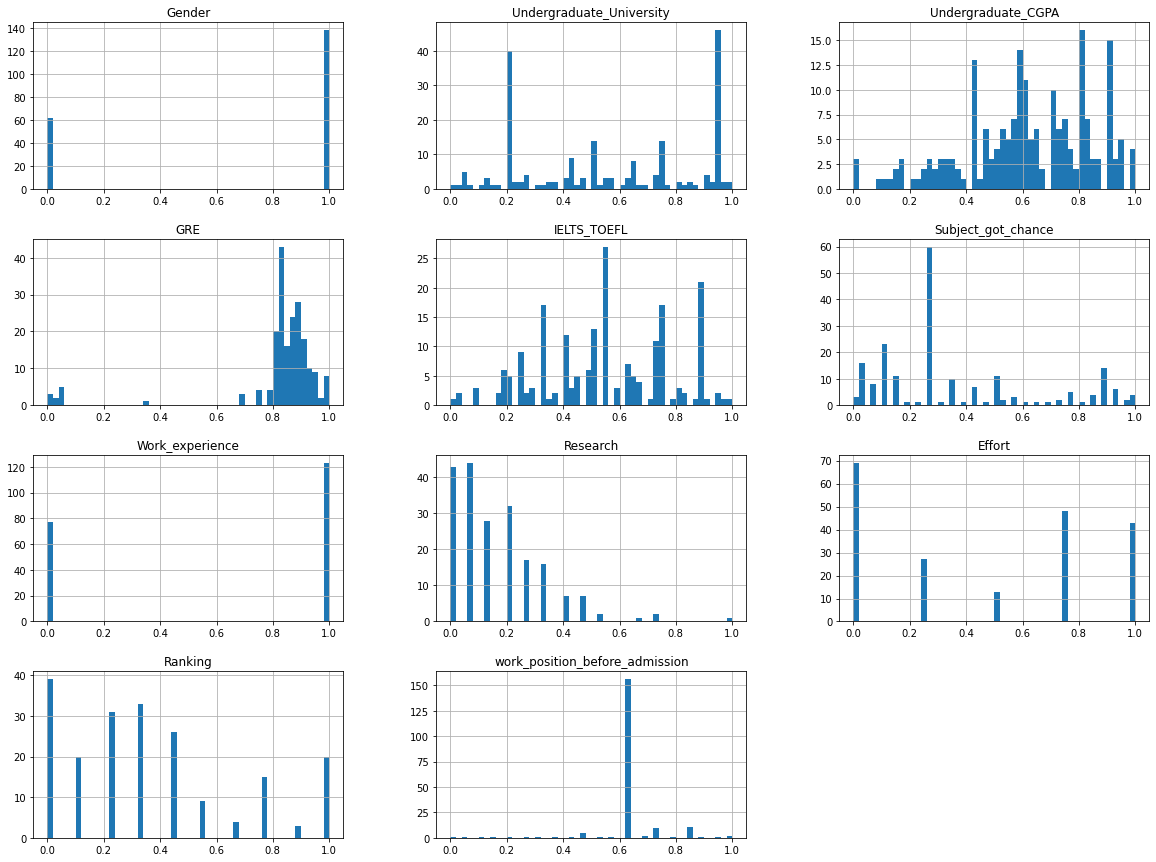

In [22]:
X_Data.hist(bins=50, figsize=(20, 15))

# Question Answer

In [23]:
label_X

,Gender,Undergraduate_University,Undergraduate_CGPA,GRE,IELTS_TOEFL,Subject_got_chance,Work_experience,Research,Effort,Ranking,Chance,work_position_before_admission
0,1.0,6.0,3.520,296,99,11.0,1,0,3.0,5,1,5.0
1,1.0,22.0,3.670,303,81,7.0,0,1,3.0,3,1,12.0
2,1.0,29.0,3.820,309,98,7.0,1,1,4.0,6,1,12.0
3,0.0,8.0,3.240,315,111,7.0,0,2,1.0,1,1,12.0
4,1.0,13.0,3.800,302,108,3.0,0,6,4.0,4,1,1.0
5,0.0,8.0,3.930,302,104,3.0,0,7,0.0,1,1,3.0
6,0.0,38.0,3.110,303,88,24.0,0,0,1.0,5,1,12.0
7,0.0,37.0,3.910,300,101,1.0,1,7,4.0,3,1,12.0
8,1.0,38.0,3.940,302,93,1.0,0,1,3.0,6,1,12.0
9,1.0,39.0,3.160,165,93,7.0,0,0,1.0,6,1,12.0


In [24]:
df.head(5)

,Gender,Undergraduate_University,Undergraduate_CGPA,GRE,IELTS_TOEFL,Subject_got_chance,Work_experience,Research,Effort,Ranking,Chance,work_position_before_admission
0,Male,Bachelor of dental surgery,3.52,296,99,Food and Health Nutration,1,0,Satisfactory,5,1,Dental Assistant
1,Male,Mawlana Bhashani Science and Technology Univer...,3.67,303,81,Computer Science,0,1,Satisfactory,3,1,Lecturer
2,Male,Rajshahi University of Engineering & Technology,3.82,309,98,Computer Science,1,1,Very good,6,1,Lecturer
3,Female,Bangladesh University of Engineering and Techn...,3.24,315,111,Computer Science,0,2,Fair,1,1,Lecturer
4,Male,International Islamic University Chittagong,3.80,302,108,Chemistry,0,6,Very good,4,1,Assistant Chemist


# Visualise

In [25]:
#male or female priority by chance
def bar_chart(feature):
    chance = df[df['Chance']==1][feature].value_counts()
    no_chance = df[df['Chance']==0][feature].value_counts()
    dfx = pd.DataFrame([chance,no_chance])
    dfx.index = ['Got Chance','No Chance']
    dfx.plot(kind='bar',stacked=True, figsize=(10,5))

# Gender

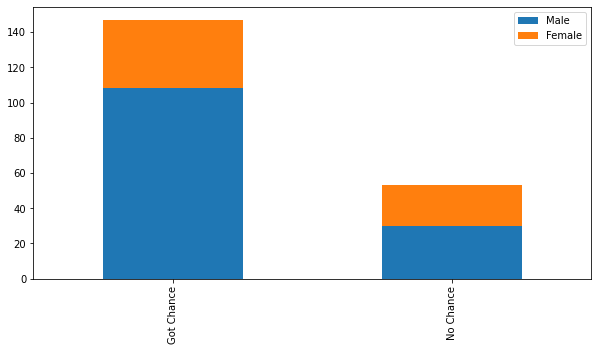

In [26]:
bar_chart('Gender')

The Chart confirms **Male** more likely chance than **Female**

# University

In [27]:
def bar_chart(feature):
    chance = df[df['Chance']==1][feature].value_counts()
    dfx = pd.DataFrame([chance])
    dfx.index = ['Got Chance']
    dfx.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.legend(loc="right", bbox_to_anchor=(0.25, -0), ncol= 1)


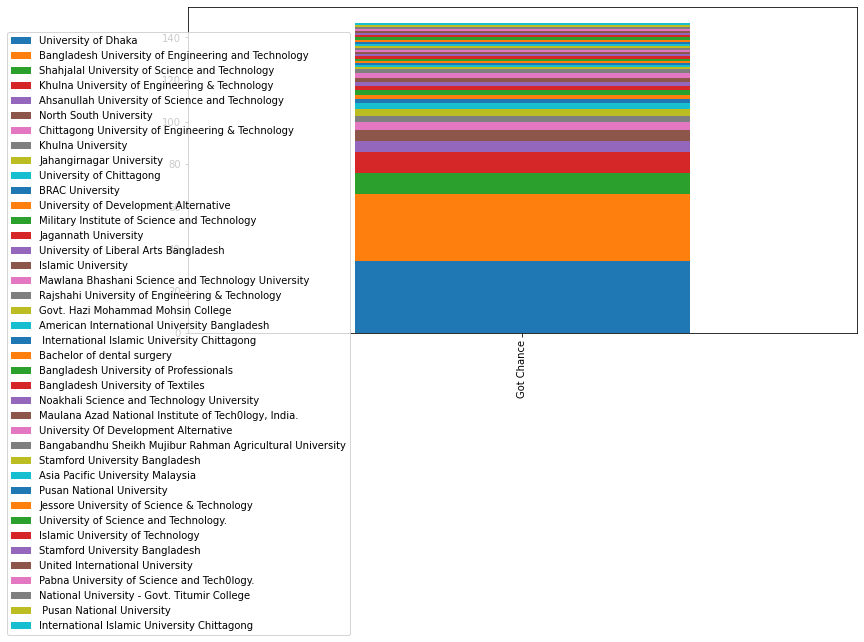

In [28]:
bar_chart('Undergraduate_University')

In [29]:
varsity_most= df['Undergraduate_University'].value_counts()
# varsity_most

<AxesSubplot:ylabel='Undergraduate_University'>

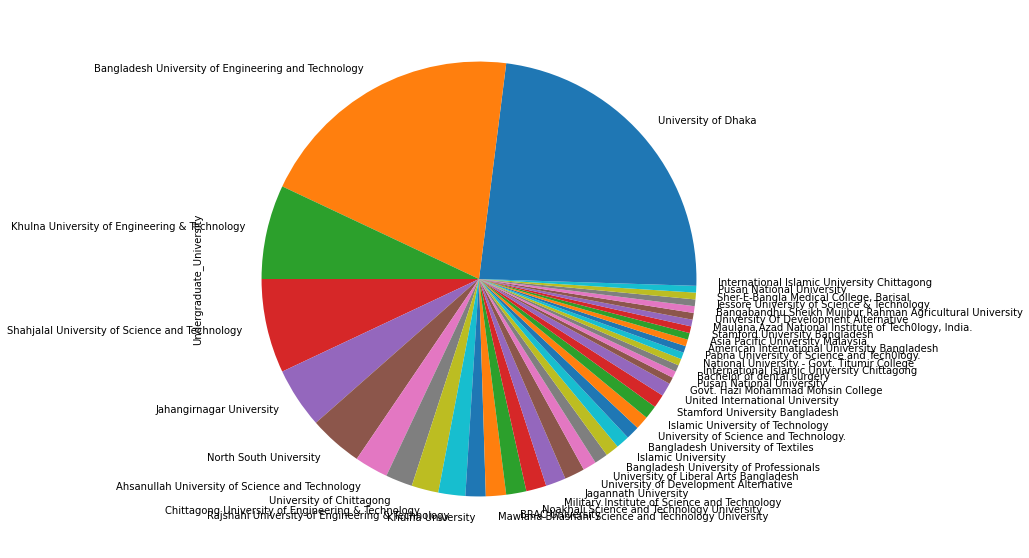

In [30]:
varsity_most.plot(kind= "pie",figsize=(12,10))

In [31]:
df['Ranking'].value_counts()

1     39
4     33
3     31
5     26
10    20
2     20
8     15
6      9
7      4
9      3
Name: Ranking, dtype: int64

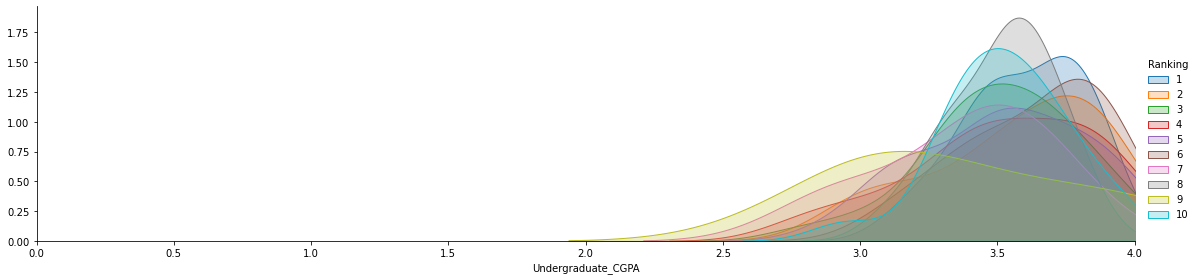

In [32]:
facet = sns.FacetGrid(df, hue="Ranking",aspect=4,height=4)
facet.map(sns.kdeplot,'Undergraduate_CGPA',shade= True)
facet.set(xlim=(0, df['Undergraduate_CGPA'].max()))
facet.add_legend()
 
plt.show() 

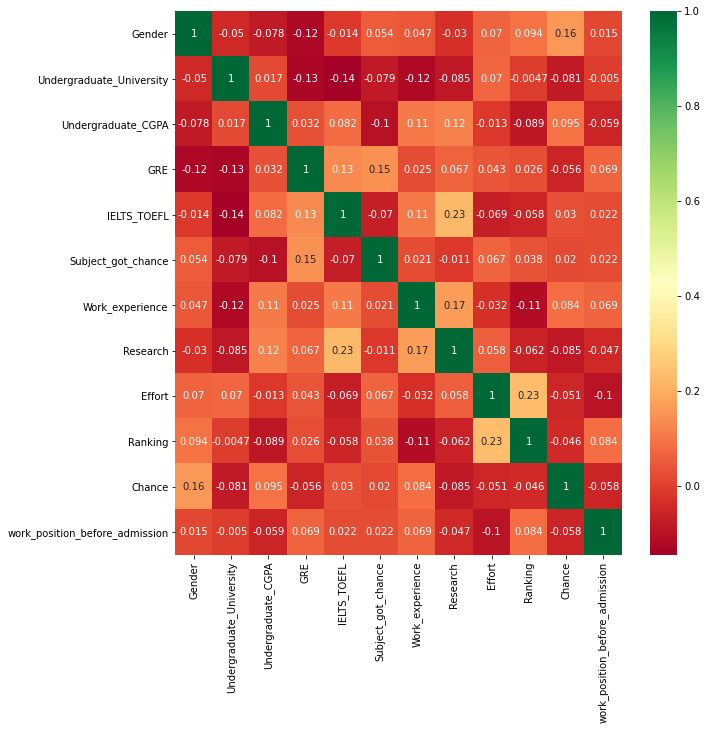

In [33]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = label_X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(label_X.corr(),annot=True,cmap="RdYlGn")

# Modeling

In [34]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef

In [35]:
X_Data.shape, Y_Data.shape

((200, 11), (200,))

# K-Fold cv

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## Logistic Regression

In [37]:
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, X_Data, Y_Data, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8  0.7  0.7  0.65 0.85 0.8  0.65 0.65 0.7  0.8 ]


In [38]:
#LogisticRegression Score
round(np.mean(score)*100, 2)

73.0

In [39]:
clf = LogisticRegression()
clf.fit(X_Data, Y_Data)

LogisticRegression()

In [40]:
print(classification_report(Y_Data, clf.predict(X_Data)))

              precision    recall  f1-score   support

           0       0.67      0.04      0.07        53
           1       0.74      0.99      0.85       147

    accuracy                           0.74       200
   macro avg       0.70      0.52      0.46       200
weighted avg       0.72      0.74      0.64       200



In [41]:
confusion_matrix(Y_Data, clf.predict(X_Data))

array([[  2,  51],
       [  1, 146]], dtype=int64)

In [42]:
some_data = X_Data.iloc[:201]

In [43]:
some_labels = Y_Data.iloc[:10]

In [44]:
# clf.predict(some_data)

## Decision Tree

In [45]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_Data, Y_Data, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7  0.5  0.65 0.7  0.7  0.6  0.75 0.55 0.75 0.55]


In [46]:
#DecisionTreeClassifier Score
round(np.mean(score)*100, 2)

64.5

##  SVM

In [47]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_Data, Y_Data, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7  0.75 0.7  0.6  0.85 0.8  0.7  0.6  0.65 0.8 ]


In [48]:
#SVC Score
round(np.mean(score)*100, 2)

71.5

# Random Forest

In [49]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_Data, Y_Data, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.55 0.7  0.75 0.65 0.9  0.8  0.65 0.5  0.7  0.75]


In [50]:
round(np.mean(score)*100, 2)

69.5

# Naive Bayes


In [51]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_Data, Y_Data, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.65 0.65 0.55 0.65 0.6  0.85 0.35 0.6  0.55 0.65]


In [52]:
round(np.mean(score)*100, 2)

61.0

## SGD Classifier

In [53]:
sgd = SGDClassifier(
    loss='log',
    penalty='none',
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=10,
    tol= 0.001,
    validation_fraction=0.1,
    learning_rate='constant',
    eta0=0.1,
    verbose=1
)
scoring = 'accuracy'
score = cross_val_score(sgd, X_Data, Y_Data, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

-- Epoch 1
Norm: 0.86, NNZs: 11, Bias: 0.331707, T: 162, Avg. loss: 0.549069
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.90, NNZs: 11, Bias: 0.193886, T: 324, Avg. loss: 0.536572
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.29, NNZs: 11, Bias: 0.383675, T: 486, Avg. loss: 0.526893
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.34, NNZs: 11, Bias: 0.351850, T: 648, Avg. loss: 0.526685
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 11, Bias: 0.456018, T: 810, Avg. loss: 0.519241
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.67, NNZs: 11, Bias: 0.551481, T: 972, Avg. loss: 0.513557
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1.68, NNZs: 11, Bias: 0.464932, T: 1134, Avg. loss: 0.524704
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 1.79, NNZs: 11, Bias: 0.496211, T: 1296, Avg. loss: 0.521088
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 1.88, NNZs: 11, Bias: 0.569081, T: 1458, Avg. loss: 0.515315
Total training time: 0.0

In [54]:
round(np.mean(score)*100, 2)

70.5

### Logistic Regression have performed best. Which is 73.0.

# Using Sampling technique to correct Imbalance Data using holdout CV

In [55]:
# pip install imblearn

In [56]:
# from sklearn.model_selection import train_test_split
# X_train,X_test, y_train,y_test = \
# train_test_split(X_Data,Y_Data,test_size=0.2,random_state=10)

In [57]:
clf = LogisticRegression()
clf.fit(X_Data,Y_Data)

LogisticRegression()

In [58]:
y_predict = clf.predict(X_Data)

In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_Data,y_predict))
pd.crosstab(Y_Data,y_predict)

0.74


col_0,0,1
Chance,,
0,2,51
1,1,146


In [60]:
confusion_matrix(Y_Data, clf.predict(X_Data))

array([[  2,  51],
       [  1, 146]], dtype=int64)

In [61]:
print(classification_report(Y_Data, clf.predict(X_Data)))

              precision    recall  f1-score   support

           0       0.67      0.04      0.07        53
           1       0.74      0.99      0.85       147

    accuracy                           0.74       200
   macro avg       0.70      0.52      0.46       200
weighted avg       0.72      0.74      0.64       200



# Using oversampling

In [62]:

# from imblearn.over_sampling import SMOTE
# smote = SMOTE()

In [63]:
# X_train_smote, y_train_smote = smote.fit_resample(X_Data,Y_Data)

In [64]:
# from collections import Counter
# print("Before SMOTE :" , Counter(Y_Data))
# print("After SMOTE :" , Counter(y_train_smote))

In [65]:
# clf.fit(X_train_smote,y_train_smote)
# y_predict = clf.predict(X_Data)
# print(accuracy_score(Y_Data,y_predict))
# pd.crosstab(Y_Data,y_predict)

In [66]:
# print(classification_report(y_train_smote, clf.predict(X_train_smote)))

# Using Undersampling

In [67]:
from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
X_train_smote, y_train_smote = nm.fit_resample(X_Data,Y_Data)

In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(Y_Data))
print("After SMOTE :" , Counter(y_train_smote))

In [ ]:
clf.fit(X_train_smote,y_train_smote)
y_predict = clf.predict(X_Data)
print(accuracy_score(Y_Data,y_predict))
pd.crosstab(Y_Data,y_predict)

In [ ]:
print(classification_report(y_train_smote, clf.predict(X_train_smote)))

# Modeling after sampling

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train_smote, y_train_smote, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
#DecisionTreeClassifier Score
round(np.mean(score)*100, 2)

In [ ]:
sgd = SGDClassifier(
    loss='log',
    penalty='none',
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=10,
    tol= 0.001,
    validation_fraction=0.1,
    learning_rate='constant',
    eta0=0.1,
    verbose=1
)
scoring = 'accuracy'
score = cross_val_score(sgd, X_train_smote, y_train_smote, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100, 2)

In [ ]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train_smote, y_train_smote, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100, 2)

In [ ]:
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, X_train_smote, y_train_smote, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100, 2)

## Decision Tree Give Highest accuracy which is 73.11.
